# Google Colab Mini Rehber
*Hazırlandı: 2025-08-27 04:43*

Bu not defteri, Google Colab'da sık yapılan işlemler için kısa örnekler içerir: paket yükleme/silme, dosya yönetimi, grafik kaydetme/indirme, Drive kullanımı, ortamı sıfırlama ipuçları, ve küçük testler.

> İpucu: Hücreleri tek tek çalıştırarak ilerleyin. Gerektiğinde **Runtime → Factory reset runtime** ile tamamen temiz bir ortama dönebilirsiniz.

## 1) Ortam Bilgisi

In [ ]:
# Python, pip ve GPU bilgisi
import sys, subprocess, platform
print("Python:", sys.version)
print("Platform:", platform.platform())

# Pip konumu ve sürümü
!pip --version

# GPU var mı?
!nvidia-smi || echo "GPU bulunamadı (CPU ile çalışılıyor)."


Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Platform: Linux-6.1.123+-x86_64-with-glibc2.35
pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
/bin/bash: line 1: nvidia-smi: command not found
GPU bulunamadı (CPU ile çalışılıyor).


## 2) Paket Yükleme ve Kaldırma
- `pip install paket_adi`
- `pip uninstall -y paket_adi`
- Sistem paketleri için: `apt-get install -y paket_adi`

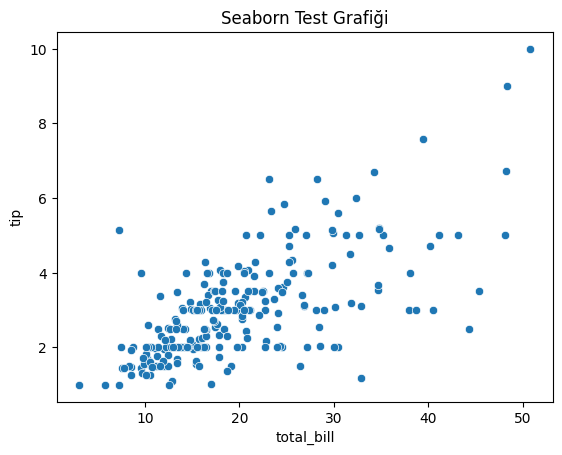

In [ ]:
# Örnek: seaborn yükle / kaldır (isteğe bağlı)
# Yükleme
!pip install -q seaborn

# Kullanım testi
import seaborn as sns, matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Seaborn Test Grafiği")
plt.show()

# Kaldırma (gerekirse)
# !pip uninstall -y seaborn


## 3) Dosya Yönetimi: Kaydetme / Yükleme / İndirme
- Yerel dosya sistemindeki yol: `/content/`
- Bilgisayardan yükleme: `files.upload()`
- Dosya indirme: `files.download('dosya')`

In [ ]:
from google.colab import files
from pathlib import Path

# Örnek bir metin dosyası oluşturup indirme
Path('ornek.txt').write_text('Merhaba Colab!')
files.download('ornek.txt')

# Bilgisayardan dosya yüklemek için (diálogo açar):
# uploaded = files.upload()
# list(uploaded.keys())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4) Grafik Kaydetme ve Otomatik İndirme
Matplotlib grafiğini diske kaydedip ardından otomatik indirme.

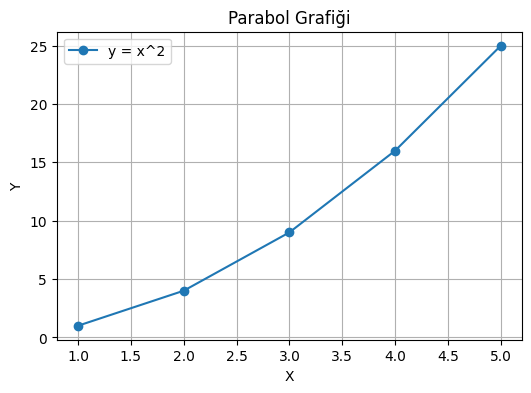

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

x = [1,2,3,4,5]
y = [i**2 for i in x]

plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o', label='y = x^2')
plt.title('Parabol Grafiği')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# PNG, JPG ve PDF olarak kaydet
plt.savefig('grafik.png', dpi=300, bbox_inches='tight')
plt.savefig('grafik.jpg', dpi=300, bbox_inches='tight')
plt.savefig('grafik.pdf', bbox_inches='tight')
plt.show()

# Dosyaları indir
files.download('grafik.png')
files.download('grafik.jpg')
files.download('grafik.pdf')


## 5) Google Drive Bağlama
Drive içindeki dosyalara erişmek için:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Örnek: Drive'a bir dosya yazma
with open('/content/drive/MyDrive/colab_ornek_dosya.txt', 'w', encoding='utf-8') as f:
    f.write('Drive deneme satırı.')

print('Drive yazma tamam. MyDrive klasörünü kontrol edin.')


MessageError: Error: credential propagation was unsuccessful

## 6) Veri ile Çalışma: Pandas Hızlı Örnek

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Ad': ['Ali', 'Ayşe', 'Mehmet', 'Zeynep'],
    'Yaş': [23, 31, 27, 29],
    'Puan': [85, 92, 76, 88]
})
display(df)

# CSV'ye kaydet ve indir
df.to_csv('veri.csv', index=False)
from google.colab import files
files.download('veri.csv')


,Ad,Yaş,Puan
0,Ali,23,85
1,Ayşe,31,92
2,Mehmet,27,76
3,Zeynep,29,88


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7) Ortamı Sıfırlama (Reset) Notları
- **Restart runtime**: Aynı makineyi yeniden başlatır → değişkenler silinir, paketler çoğu zaman kalır.
- **Disconnect**: Bağlantıyı keser → tekrar bağlanınca kaldığınız yerden devam edebilir, değişkenler sıfırlanır.
- **Factory reset runtime** (*Disconnect and delete runtime*): Makineyi tamamen siler → sonradan yüklenen tüm paketler ve `/content/` içeriği gider.

**Menü:** `Runtime → Restart runtime` veya `Runtime → Factory reset runtime`.

## 8) Sık Karşılaşılan Sorunlar ve Çözümler
**a) Grafik görünmüyor** → Hücre başına `%matplotlib inline` ekleyin veya `plt.show()` çağırın.

**b) Font hatası (DejaVu Sans vs.)** → `!apt-get install -y fonts-dejavu` çalıştırın, ardından **Runtime → Restart runtime** yapın.

**c) Paket sürüm çakışmaları** → Yeni bir oturumda deneyin (Factory reset). Gerekirse belirli sürümü kurun: `pip install paket==sürüm`.

**d) Dosya yolu hataları** → Yolların `/content/` altında olduğundan emin olun; `!ls -la` ile kontrol edin.

## 9) Küçük Alıştırma: Hepsi Bir Arada
1. Rasgele veriden histogram çiz.
2. PNG olarak kaydet.
3. Dosyayı indir.
4. Aynı veriyi CSV'ye yaz ve indir.

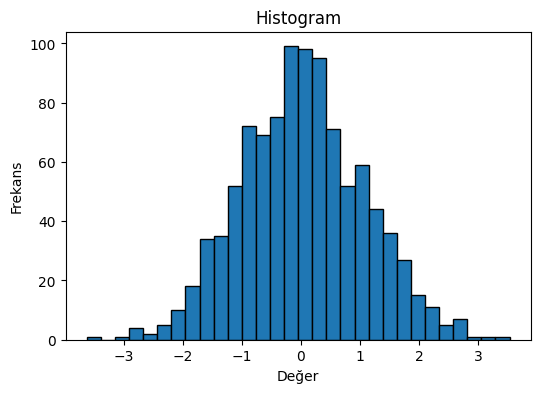

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from google.colab import files

# 1) Rasgele veri ve histogram
veri = np.random.randn(1000)
plt.figure(figsize=(6,4))
plt.hist(veri, bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.savefig('histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# 2) PNG indir
files.download('histogram.png')

# 3) CSV kaydet ve indir
pd.DataFrame({'veri': veri}).to_csv('veri_hist.csv', index=False)
files.download('veri_hist.csv')


In [15]:
!jupyter nbconvert --to html /content/Colab_Mini_Rehber.ipynb

[NbConvertApp] Converting notebook /content/Colab_Mini_Rehber.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 413426 bytes to /content/Colab_Mini_Rehber.html
